### Student ID: 22001928

### Student Name: Zarak Khan

# Loading Modules & Data

In [1]:
import pycountry
import pandas as pd
import seaborn as sns
import pycountry_convert as pc
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("API_SP.DYN.LE00.IN_DS2_en_csv_v2_4770434.csv", skiprows=4).iloc[:, :-2]
df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.465000,75.53100,75.636000,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,59.293271,60.05078,60.709863,61.337911,61.856452,62.444045,62.922385,63.365858,63.755674,63.313856
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,61.419000,61.92300,62.417000,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000


In [3]:
countries = list(pycountry.countries)
country_names = [country.name for country in countries]

df = df[df["Country Name"].isin(country_names)]

# Visualization

In [4]:
df_temp = df.iloc[:, 4:].T
df_temp.columns = df["Country Name"]
df_temp.dropna(axis=1, inplace=True)
temp_low = df_temp.mean().sort_values().iloc[:10].index
temp_up = df_temp.mean().sort_values().iloc[-10:].index

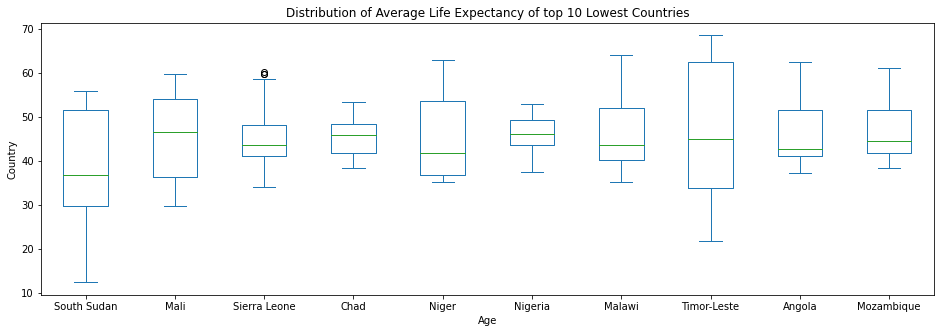

In [14]:
df_temp[temp_low].plot(kind="box", figsize=(16, 5))
plt.title("Distribution of Average Life Expectancy of top 10 Lowest Countries")
plt.xlabel("Age")
plt.ylabel("Country")
plt.show()

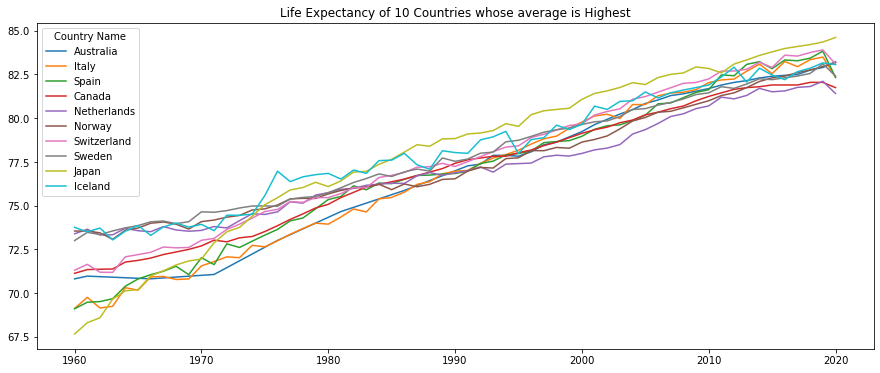

In [6]:
df_temp[temp_up].plot(kind="line", figsize=(15, 6))
plt.title("Life Expectancy of 10 Countries whose average is Highest")
plt.show()

In [7]:
def get_continent(country_name):
    try:
        # Convert country name to ISO 3166-1 alpha-2 code
        country_code = pc.country_name_to_country_alpha2(country_name)
        # Use a dictionary to map alpha-2 codes to continents
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return "Unknown"


df["continent"] = df["Country Name"].apply(get_continent)

In [8]:
df_temp = df.iloc[:, 4:-1].T
df["Avg_Life"] = df.iloc[:, 4:-1].mean(axis=1)
temp = df[["continent", "Avg_Life"]].groupby("continent").mean()

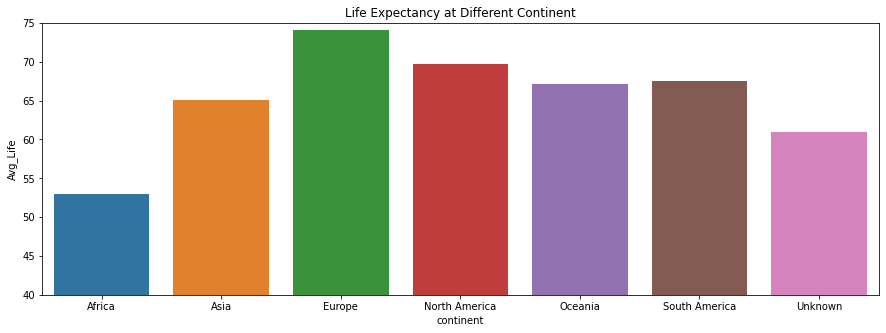

In [9]:
plt.figure(figsize=(15, 5))
sns.barplot(temp.index, temp.Avg_Life)
plt.ylim(40, 75)
plt.title("Life Expectancy at Different Continent")
plt.show()